In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('fivethirtyeight')


In [11]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df.set_index('fips',inplace=True)

In [3]:
#test = pd.read_csv('https://health.data.ny.gov/api/views/jr8b-6gh6/rows.csv')

In [12]:
df.head()

,date,state,cases,deaths
fips,,,,
53,2020-01-21,Washington,1,0
53,2020-01-22,Washington,1,0
53,2020-01-23,Washington,1,0
17,2020-01-24,Illinois,1,0
53,2020-01-24,Washington,1,0


In [5]:
url = 'https://raw.githubusercontent.com/JoshData/historical-state-population-csv/primary/historical_state_population_by_year.csv'
pop = pd.read_csv(url,names=['state','year','population'])

pop = pop[pop['year']==pop['year'].max()]


In [6]:
url = 'https://raw.githubusercontent.com/Zoooook/CoronavirusTimelapse/master/static/population.json'
pop = pd.read_json(url)

In [10]:
pop= pop.groupby(['us_state_fips'])['population'].sum()
pop.head()

us_state_fips
1     4864680
2      738516
4     6946685
5     2990671
6    39148760
Name: population, dtype: int64

In [25]:
 full = df.join(pop,how='inner')

In [26]:
full.reset_index(inplace=True, drop=True)

In [27]:
full.set_index(['date'],drop=False,inplace=True)

In [28]:
full.head()

,date,state,cases,deaths,population
date,,,,,
2020-03-13,2020-03-13,Alabama,6,0,4864680
2020-03-14,2020-03-14,Alabama,12,0,4864680
2020-03-15,2020-03-15,Alabama,23,0,4864680
2020-03-16,2020-03-16,Alabama,29,0,4864680
2020-03-17,2020-03-17,Alabama,39,0,4864680


In [29]:
full['new_cases'] = full['cases']-full.groupby(full['state'])['cases'].shift()
full['new_deaths'] = full['deaths']-full.groupby(full['state'])['deaths'].shift()

In [30]:
full['case_normalized']= full['cases']/(full['population']/1000)
full['deaths_normalized']= full['deaths']/(full['population']/1000)
full['new_cases_normalized']= full['new_cases']/(full['population']/1000)
full['new_deaths_normalized']= full['new_deaths']/(full['population']/1000)

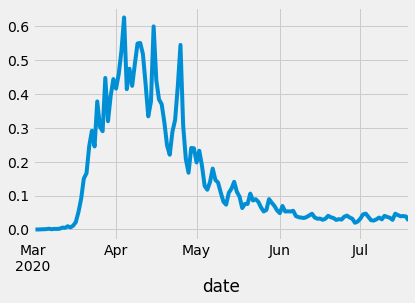

In [31]:
full[full['state']=='New York']['new_cases_normalized'].plot()

In [32]:
ny_max_rate=full[full['state']=='New York']['new_cases_normalized'].max()
ny_max_date=full[full['new_cases_normalized']==ny_max_rate]['date'].values[0]
set_min_date = full['date'].min()
set_max_date = full['date'].max()
az_min_date = set_max_date + (set_min_date - ny_max_date)

Text(0.5, 1.0, 'Arizona New Cases per 100k')

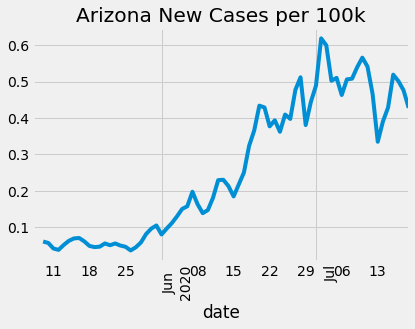

In [35]:
full[
    (full['state']=='Arizona')&
    (full['date']>az_min_date)]['new_cases_normalized'].rolling(window=3).mean().plot()
plt.xticks(rotation=90)
plt.title('Arizona New Cases per 100k')

(array([0.e+00, 1.e+15, 2.e+15, 3.e+15, 4.e+15, 5.e+15, 6.e+15]),
 <a list of 7 Text xticklabel objects>)

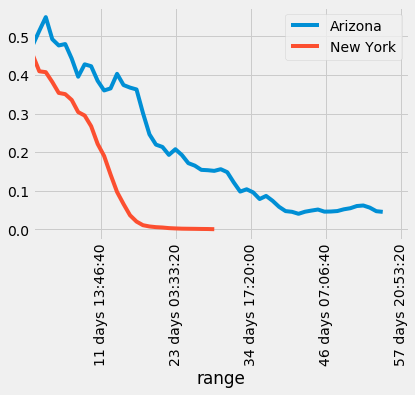

In [16]:
pd.DataFrame(
{'Arizona':
full[
    (full['state']=='Arizona')&
    (full['range']<'60 days')&
    (full['range']> '0 days')].set_index(['range'])['new_cases_normalized'].\
 rolling(window=5).\
 mean(),
'New York':
full[
    (full['state']=='New York')&
    (full['range']<'60 days')&
    (full['range']> '0 days')].set_index(['range'])['new_cases_normalized'].\
 rolling(window=5).\
 mean()
}).plot()
plt.xticks(rotation=90)